In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *
import time
from utils import *

In [51]:
n = 8 # number of segments (i.e., no. of repeaters -1 )
F_link = 1 # fidelity of local BP
mu_link = 1 # depolarizing noise channel parameter (1: no noise, 0: fully depolarized)

τ_coh = 3e-3
num_τ = 200
τ_cut_list = np.logspace(-1.5,1,num_τ)*τ_coh # cutoff [sec]
# τ_cut_list = np.linspace(,-2,num_τ) # cutoff [sec]

Le2e_list = [200,300,400]
raw_rate_seq = np.zeros((len(Le2e_list),num_τ))
skr_seq = np.zeros((len(Le2e_list),num_τ))
Fe2e_seq = np.zeros((len(Le2e_list),num_τ))

raw_rate_seq_no_cut = np.zeros(len(Le2e_list))
skr_seq_no_cut = np.zeros(len(Le2e_list))
Fe2e_seq_no_cut = np.zeros(len(Le2e_list))

for i_L, Le2e in enumerate(Le2e_list):
    Ls = [Le2e/n]*n
    
    print(i_L, end='\r')
    for i_t, τ_cut in enumerate(τ_cut_list):
        raw_rate_seq[i_L,i_t], skr_seq[i_L,i_t], Fe2e_seq[i_L,i_t] = T_sequential_cutoff(τ_cut,τ_coh, mu_link, F_link, Ls)
        if isnan(skr_seq[i_L,i_t]):
            skr_seq[i_L,i_t] = 0#1e-20
    raw_rate_seq_no_cut[i_L], skr_seq_no_cut[i_L], Fe2e_seq_no_cut[i_L] = T_sequential_no_cutoff(τ_coh, mu_link, F_link, Ls)



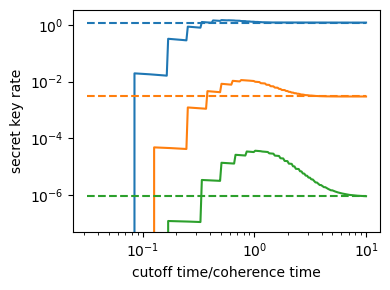

In [52]:
# plt.figure(figsize=(4,3))
# plt.plot(τ_cut_list/τ_coh, raw_rate_seq.T,"-")
# for i_L, Le2e in enumerate(Le2e_list):
#     plt.plot(τ_cut_list/τ_coh,raw_rate_seq_no_cut[i_L] + 0*τ_cut_list,"--", color=f"C{i_L}")

# plt.yscale("log")
# plt.xscale("log")
# plt.ylabel("ebit rate")
# plt.xlabel("cutoff time/coherence time")
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(4,3))
plt.plot(τ_cut_list/τ_coh, skr_seq.T,"-")
for i_L, Le2e in enumerate(Le2e_list):
    plt.plot(τ_cut_list/τ_coh,skr_seq_no_cut[i_L] + 0*τ_cut_list,"--", color=f"C{i_L}")

plt.yscale("log")
plt.xscale("log")
# plt.yticks([1e-2,1e0,1e2])
# plt.ylim([6e-4,2e2])
plt.ylabel("secret key rate")
plt.xlabel("cutoff time/coherence time")
plt.tight_layout()
plt.show()

# plt.figure(figsize=(4,3))
# plt.plot(τ_cut_list/τ_coh, Fe2e_seq.T,"-")
# for i_L, Le2e in enumerate(Le2e_list):
#     plt.plot(τ_cut_list/τ_coh,Fe2e_seq_no_cut[i_L] + 0*τ_cut_list,"--", color=f"C{i_L}")

# plt.yscale("log")
# plt.xscale("log")
# plt.ylabel("Fidelity")
# plt.xlabel("cutoff time/coherence time")
# plt.tight_layout()
# plt.show()



In [53]:
n = 8 # number of segments (i.e., no. of repeaters -1 )
F_link = 1 # fidelity of local BP
mu_link = 1 # depolarizing noise channel parameter (1: no noise, 0: fully depolarized)

Nmc = 1e5
τ_coh = 3e-3
num_τ = 200
τ_cut_list = np.logspace(-1.5,1,num_τ)*τ_coh # cutoff [sec]
# τ_cut_list = np.linspace(,-2,num_τ) # cutoff [sec]

Le2e_list = [200,300,400]
raw_rate_par = np.zeros((len(Le2e_list),num_τ))
skr_par = np.zeros((len(Le2e_list),num_τ))
Fe2e_par = np.zeros((len(Le2e_list),num_τ))

raw_rate_par_no_cut = np.zeros(len(Le2e_list))
skr_par_no_cut = np.zeros(len(Le2e_list))
Fe2e_par_no_cut = np.zeros(len(Le2e_list))

for i_L, Le2e in enumerate(Le2e_list):
    Ls = [Le2e/n]*n
    
    print(i_L, end='\r')
    for i_t, τ_cut in enumerate(τ_cut_list):
        raw_rate_par[i_L,i_t], skr_par[i_L,i_t], Fe2e_par[i_L,i_t] = T_parallel_cutoff(τ_cut, τ_coh, mu_link, F_link, Ls, cct= True, Nmax=Nmc)
        if isnan(skr_seq[i_L,i_t]):
            skr_par[i_L,i_t] = 0#1e-20
    raw_rate_par_no_cut[i_L], skr_par_no_cut[i_L], Fe2e_par_no_cut[i_L] =  T_parallel_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= True, Nmax=Nmc)

out_dir = 'data_color_plot/'
fname = f"perf_vs_cutoff_par_n_{n}.npz"
np.savez(out_dir+fname, τ_coh, Le2e_list,
        raw_rate_par, skr_par, Fe2e_par, 
        raw_rate_par_no_cut, skr_par_no_cut, Fe2e_par_no_cut)


/home/ubuntu/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ubuntu/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


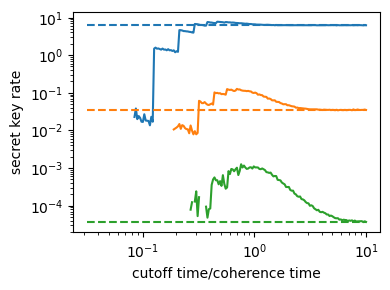

In [54]:
# plt.figure(figsize=(4,3))
# plt.plot(τ_cut_list/τ_coh, raw_rate_par.T,"-")
# for i_L, Le2e in enumerate(Le2e_list):
#     plt.plot(τ_cut_list/τ_coh,raw_rate_par_no_cut[i_L] + 0*τ_cut_list,"--", color=f"C{i_L}")

# plt.yscale("log")
# plt.xscale("log")
# plt.ylabel("ebit rate")
# plt.xlabel("cutoff time/coherence time")
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(4,3))
plt.plot(τ_cut_list/τ_coh, skr_par.T,"-")
for i_L, Le2e in enumerate(Le2e_list):
    plt.plot(τ_cut_list/τ_coh,skr_par_no_cut[i_L] + 0*τ_cut_list,"--", color=f"C{i_L}")

plt.yscale("log")
plt.xscale("log")
# plt.yticks([1e-2,1e0,1e2])
# plt.ylim([1e-2,5e2])
plt.ylabel("secret key rate")
plt.xlabel("cutoff time/coherence time")
plt.tight_layout()
plt.show()

# plt.figure(figsize=(4,3))
# plt.plot(τ_cut_list/τ_coh, Fe2e_par.T,"-")
# for i_L, Le2e in enumerate(Le2e_list):
#     plt.plot(τ_cut_list/τ_coh,Fe2e_par_no_cut[i_L] + 0*τ_cut_list,"--", color=f"C{i_L}")

# plt.yscale("log")
# plt.xscale("log")
# plt.ylabel("Fidelity")
# plt.xlabel("cutoff time/coherence time")
# plt.tight_layout()
# plt.show()

